In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #for analysing data using graphs 
from sklearn.model_selection import train_test_split    #for splitting training and testing data
from sklearn.linear_model import LogisticRegression    #for logistic regression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score   
from sklearn.neighbors import KNeighborsClassifier    #for KNN
from sklearn.svm import SVC #for SVM
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Importing data into dataframes

In [2]:
df_odi = pd.read_csv('ODI.csv')

In [3]:
df_t20 = pd.read_csv('Combined_Summary_T20_2005_to_May_11_2023.csv')

In [4]:
df_odi.head(10)

,Team_1,Team_2,Winner,Margin,Ground,Match Date,Bat first,Pitch Advantage,Home Advantage
0,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971",England,Balanced,Australia
1,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972",Australia,Bowling,England (United Kingdom)
2,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972",England,Balanced,England (United Kingdom)
3,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972",Australia,Balanced,England (United Kingdom)
4,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973",New Zealand,Balanced,New Zealand
5,England,New Zealand,England,7 wickets,Swansea,"Jul 18, 1973",New Zealand,Balanced,Wales (United Kingdom)
6,England,New Zealand,NaN,-,Manchester,"Jul 20, 1973",New Zealand,Bowling,England (United Kingdom)
7,England,West Indies,England,1 wicket,Leeds,"Sep 5, 1973",West Indies,Balanced,England (United Kingdom)
8,England,West Indies,West Indies,8 wickets,The Oval,"Sep 7, 1973",England,Balanced,England (United Kingdom)
9,New Zealand,Australia,Australia,7 wickets,Dunedin,"Mar 30, 1974",New Zealand,Balanced,New Zealand


In [5]:
df_t20.head(10)

,Team 1,Team 2,Winner,Margin,Ground,Match Date,match_id,Bat first,Pitch Advantage,Home Advantage
0,New Zealand,Australia,Australia,44 runs,Auckland,"Feb 17, 2005",T20I # 1,Australia,Batting,New Zealand
1,England,Australia,England,100 runs,Southampton,"Jun 13, 2005",T20I # 2,England,Balanced,England (United Kingdom)
2,South Africa,New Zealand,New Zealand,5 wickets,Johannesburg,"Oct 21, 2005",T20I # 3,South Africa,Batting,South Africa
3,Australia,South Africa,Australia,95 runs,Brisbane,"Jan 9, 2006",T20I # 4,Australia,Batting,Australia
4,New Zealand,West Indies,NaN,-,Auckland,"Feb 16, 2006",T20I # 5,New Zealand,Batting,New Zealand
5,South Africa,Australia,South Africa,2 runs,Johannesburg,"Feb 24, 2006",T20I # 6,South Africa,Batting,South Africa
6,England,Sri Lanka,Sri Lanka,2 runs,Southampton,"Jun 15, 2006",T20I # 7,Sri Lanka,Balanced,England (United Kingdom)
7,England,Pakistan,Pakistan,5 wickets,Bristol,"Aug 28, 2006",T20I # 8,England,Balanced,England (United Kingdom)
8,Bangladesh,Zimbabwe,Bangladesh,43 runs,Khulna,"Nov 28, 2006",T20I # 9,Bangladesh,Balanced,Bangladesh
9,South Africa,India,India,6 wickets,Johannesburg,"Dec 1, 2006",T20I # 10,South Africa,Batting,South Africa


In [6]:
df_odi.shape

(4578, 9)

### Data Cleaning

#### Finding if there is any null values

In [7]:
df_odi.isnull().sum()

Team_1               0
Team_2               0
Winner             203
Margin               0
Ground               0
Match Date           0
Bat first            0
Pitch Advantage      0
Home Advantage       0
dtype: int64

#### Dropping all the null values

In [8]:
df_odi = df_odi.dropna()


In [9]:
df_odi.head(10)

,Team_1,Team_2,Winner,Margin,Ground,Match Date,Bat first,Pitch Advantage,Home Advantage
0,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971",England,Balanced,Australia
1,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972",Australia,Bowling,England (United Kingdom)
2,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972",England,Balanced,England (United Kingdom)
3,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972",Australia,Balanced,England (United Kingdom)
4,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973",New Zealand,Balanced,New Zealand
5,England,New Zealand,England,7 wickets,Swansea,"Jul 18, 1973",New Zealand,Balanced,Wales (United Kingdom)
7,England,West Indies,England,1 wicket,Leeds,"Sep 5, 1973",West Indies,Balanced,England (United Kingdom)
8,England,West Indies,West Indies,8 wickets,The Oval,"Sep 7, 1973",England,Balanced,England (United Kingdom)
9,New Zealand,Australia,Australia,7 wickets,Dunedin,"Mar 30, 1974",New Zealand,Balanced,New Zealand
10,New Zealand,Australia,Australia,31 runs,Christchurch,"Mar 31, 1974",Australia,Balanced,New Zealand


In [10]:
df_odi.isnull().sum()

Team_1             0
Team_2             0
Winner             0
Margin             0
Ground             0
Match Date         0
Bat first          0
Pitch Advantage    0
Home Advantage     0
dtype: int64

#### Finding if there is any null values

In [11]:
df_t20.isnull().sum()

Team 1               0
Team 2               0
Winner              82
Margin               0
Ground               0
Match Date           0
match_id             0
Bat first            0
Pitch Advantage      0
Home Advantage       0
dtype: int64

#### Dropping null values

In [12]:
df_t20 = df_t20.dropna()

In [13]:
df_t20.isnull().sum()

Team 1              0
Team 2              0
Winner              0
Margin              0
Ground              0
Match Date          0
match_id            0
Bat first           0
Pitch Advantage     0
Home Advantage      0
dtype: int64

In [14]:
df_t20.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,match_id,Bat first,Pitch Advantage,Home Advantage
0,New Zealand,Australia,Australia,44 runs,Auckland,"Feb 17, 2005",T20I # 1,Australia,Batting,New Zealand
1,England,Australia,England,100 runs,Southampton,"Jun 13, 2005",T20I # 2,England,Balanced,England (United Kingdom)
2,South Africa,New Zealand,New Zealand,5 wickets,Johannesburg,"Oct 21, 2005",T20I # 3,South Africa,Batting,South Africa
3,Australia,South Africa,Australia,95 runs,Brisbane,"Jan 9, 2006",T20I # 4,Australia,Batting,Australia
5,South Africa,Australia,South Africa,2 runs,Johannesburg,"Feb 24, 2006",T20I # 6,South Africa,Batting,South Africa


### ODI DATA

In [15]:
df_odi.head(10)

,Team_1,Team_2,Winner,Margin,Ground,Match Date,Bat first,Pitch Advantage,Home Advantage
0,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971",England,Balanced,Australia
1,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972",Australia,Bowling,England (United Kingdom)
2,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972",England,Balanced,England (United Kingdom)
3,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972",Australia,Balanced,England (United Kingdom)
4,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973",New Zealand,Balanced,New Zealand
5,England,New Zealand,England,7 wickets,Swansea,"Jul 18, 1973",New Zealand,Balanced,Wales (United Kingdom)
7,England,West Indies,England,1 wicket,Leeds,"Sep 5, 1973",West Indies,Balanced,England (United Kingdom)
8,England,West Indies,West Indies,8 wickets,The Oval,"Sep 7, 1973",England,Balanced,England (United Kingdom)
9,New Zealand,Australia,Australia,7 wickets,Dunedin,"Mar 30, 1974",New Zealand,Balanced,New Zealand
10,New Zealand,Australia,Australia,31 runs,Christchurch,"Mar 31, 1974",Australia,Balanced,New Zealand


#### Gathering all the values with teams Team1(India) and Team2(Pakistan)

In [16]:
df_odi_rev = df_odi[
    ((df_odi['Team_1'] == 'India') & (df_odi['Team_2'] == 'Pakistan')) |
    ((df_odi['Team_1'] == 'Pakistan') & (df_odi['Team_2'] == 'India'))
]

In [17]:
df_odi_rev.head(10)

,Team_1,Team_2,Winner,Margin,Ground,Match Date,Bat first,Pitch Advantage,Home Advantage
53,Pakistan,India,India,4 runs,Quetta,"Oct 1, 1978",India,Balanced,Pakistan
54,Pakistan,India,Pakistan,8 wickets,Sialkot,"Oct 13, 1978",India,Balanced,Pakistan
55,Pakistan,India,Pakistan,-,Sahiwal,"Nov 3, 1978",India,Balanced,Pakistan
161,Pakistan,India,Pakistan,14 runs,Gujranwala,"Dec 3, 1982",Pakistan,Balanced,Pakistan
162,Pakistan,India,Pakistan,37 runs,Multan,"Dec 17, 1982",Pakistan,Balanced,Pakistan
163,Pakistan,India,India,18 runs,Lahore,"Dec 31, 1982",India,Balanced,Pakistan
171,Pakistan,India,Pakistan,8 wickets,Karachi,"Jan 21, 1983",India,Batting,Pakistan
223,India,Pakistan,India,4 wickets,Hyderabad (Deccan),"Sep 10, 1983",Pakistan,Balanced,India
224,India,Pakistan,India,4 wickets,Jaipur,"Oct 2, 1983",Pakistan,Balanced,India
260,India,Pakistan,India,54 runs,Sharjah,"Apr 13, 1984",India,Batting,United Arab Emirates (UAE)


In [18]:
a = 'India'
b='Pakistan'

#### Placing India in Team_1 and Pakistan in Team_2

In [19]:
df_odi_rev['Team_1'].replace({b:a},inplace=True)
df_odi_rev['Team_2'].replace({a:b},inplace=True)

C:\Users\vivek\AppData\Local\Temp\ipykernel_28504\3459360586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_odi_rev['Team_1'].replace({b:a},inplace=True)
C:\Users\vivek\AppData\Local\Temp\ipykernel_28504\3459360586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_odi_rev['Team_2'].replace({a:b},inplace=True)


In [20]:
df_odi_rev.shape

(128, 9)

In [21]:
df_odi_rev['Team_1'].replace({a:0},inplace=True)
df_odi_rev['Team_2'].replace({b:1},inplace=True)
df_odi_rev['Winner'].replace({'India':0,'Pakistan':1},inplace=True)
df_odi_rev['Bat first'].replace({'India':0,'Pakistan':1},inplace=True)

C:\Users\vivek\AppData\Local\Temp\ipykernel_28504\289748783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_odi_rev['Team_1'].replace({a:0},inplace=True)
C:\Users\vivek\AppData\Local\Temp\ipykernel_28504\289748783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_odi_rev['Team_2'].replace({b:1},inplace=True)
C:\Users\vivek\AppData\Local\Temp\ipykernel_28504\289748783.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_od

In [22]:
df_odi_rev.head(10)

,Team_1,Team_2,Winner,Margin,Ground,Match Date,Bat first,Pitch Advantage,Home Advantage
53,0,1,0,4 runs,Quetta,"Oct 1, 1978",0,Balanced,Pakistan
54,0,1,1,8 wickets,Sialkot,"Oct 13, 1978",0,Balanced,Pakistan
55,0,1,1,-,Sahiwal,"Nov 3, 1978",0,Balanced,Pakistan
161,0,1,1,14 runs,Gujranwala,"Dec 3, 1982",1,Balanced,Pakistan
162,0,1,1,37 runs,Multan,"Dec 17, 1982",1,Balanced,Pakistan
163,0,1,0,18 runs,Lahore,"Dec 31, 1982",0,Balanced,Pakistan
171,0,1,1,8 wickets,Karachi,"Jan 21, 1983",0,Batting,Pakistan
223,0,1,0,4 wickets,Hyderabad (Deccan),"Sep 10, 1983",1,Balanced,India
224,0,1,0,4 wickets,Jaipur,"Oct 2, 1983",1,Balanced,India
260,0,1,0,54 runs,Sharjah,"Apr 13, 1984",0,Batting,United Arab Emirates (UAE)


In [23]:
df_odi_rev

,Team_1,Team_2,Winner,Margin,Ground,Match Date,Bat first,Pitch Advantage,Home Advantage
53,0,1,0,4 runs,Quetta,"Oct 1, 1978",0,Balanced,Pakistan
54,0,1,1,8 wickets,Sialkot,"Oct 13, 1978",0,Balanced,Pakistan
55,0,1,1,-,Sahiwal,"Nov 3, 1978",0,Balanced,Pakistan
161,0,1,1,14 runs,Gujranwala,"Dec 3, 1982",1,Balanced,Pakistan
162,0,1,1,37 runs,Multan,"Dec 17, 1982",1,Balanced,Pakistan
...,...,...,...,...,...,...,...,...,...
3877,0,1,0,124 runs,Birmingham,"Jun 4, 2017",0,Balanced,England (United Kingdom)
3893,0,1,1,180 runs,The Oval,"Jun 18, 2017",1,Balanced,England (United Kingdom)
4039,0,1,0,8 wickets,Dubai (DSC),"Sep 19, 2018",1,Balanced,United Arab Emirates (UAE)
4043,0,1,0,9 wickets,Dubai (DSC),"Sep 23, 2018",1,Balanced,United Arab Emirates (UAE)


In [24]:
df_odi_rev['Pitch Advantage'].replace({"Batting":0},inplace=True)
df_odi_rev['Pitch Advantage'].replace({"Bowling":1},inplace=True)
df_odi_rev['Pitch Advantage'].replace({"Balanced":2},inplace=True)

df_odi_rev['Home Advantage'].replace({"India":0},inplace=True)
df_odi_rev['Home Advantage'].replace({"Pakistan":1},inplace=True)


C:\Users\vivek\AppData\Local\Temp\ipykernel_28504\1518858801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_odi_rev['Pitch Advantage'].replace({"Batting":0},inplace=True)
C:\Users\vivek\AppData\Local\Temp\ipykernel_28504\1518858801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_odi_rev['Pitch Advantage'].replace({"Bowling":1},inplace=True)
C:\Users\vivek\AppData\Local\Temp\ipykernel_28504\1518858801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

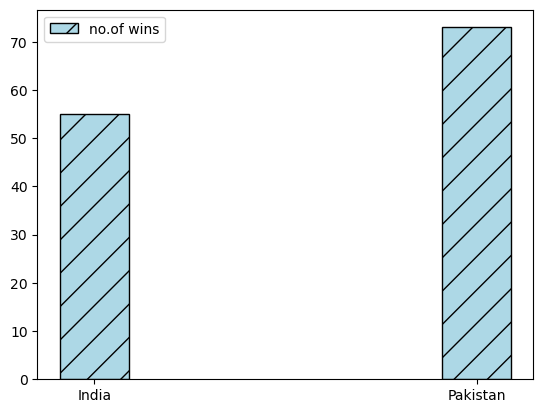

In [25]:
y = [(df_odi_rev['Winner']==0).sum(),(df_odi_rev['Winner']==1).sum()]
plt.bar(x=['India','Pakistan'],height = y ,hatch ='/',width = 0.18, color = 'lightblue',edgecolor = 'black',label = 'no.of wins')
plt.legend()
plt.show()

In [26]:
df_odi_rev

,Team_1,Team_2,Winner,Margin,Ground,Match Date,Bat first,Pitch Advantage,Home Advantage
53,0,1,0,4 runs,Quetta,"Oct 1, 1978",0,2,1
54,0,1,1,8 wickets,Sialkot,"Oct 13, 1978",0,2,1
55,0,1,1,-,Sahiwal,"Nov 3, 1978",0,2,1
161,0,1,1,14 runs,Gujranwala,"Dec 3, 1982",1,2,1
162,0,1,1,37 runs,Multan,"Dec 17, 1982",1,2,1
...,...,...,...,...,...,...,...,...,...
3877,0,1,0,124 runs,Birmingham,"Jun 4, 2017",0,2,England (United Kingdom)
3893,0,1,1,180 runs,The Oval,"Jun 18, 2017",1,2,England (United Kingdom)
4039,0,1,0,8 wickets,Dubai (DSC),"Sep 19, 2018",1,2,United Arab Emirates (UAE)
4043,0,1,0,9 wickets,Dubai (DSC),"Sep 23, 2018",1,2,United Arab Emirates (UAE)


In [27]:
df_odi_rev['Home Advantage'] = df_odi_rev['Home Advantage'].apply(lambda x: 2 if x not in [0, 1] else x)

C:\Users\vivek\AppData\Local\Temp\ipykernel_28504\1218204538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_odi_rev['Home Advantage'] = df_odi_rev['Home Advantage'].apply(lambda x: 2 if x not in [0, 1] else x)


In [28]:
df_odi_rev

,Team_1,Team_2,Winner,Margin,Ground,Match Date,Bat first,Pitch Advantage,Home Advantage
53,0,1,0,4 runs,Quetta,"Oct 1, 1978",0,2,1
54,0,1,1,8 wickets,Sialkot,"Oct 13, 1978",0,2,1
55,0,1,1,-,Sahiwal,"Nov 3, 1978",0,2,1
161,0,1,1,14 runs,Gujranwala,"Dec 3, 1982",1,2,1
162,0,1,1,37 runs,Multan,"Dec 17, 1982",1,2,1
...,...,...,...,...,...,...,...,...,...
3877,0,1,0,124 runs,Birmingham,"Jun 4, 2017",0,2,2
3893,0,1,1,180 runs,The Oval,"Jun 18, 2017",1,2,2
4039,0,1,0,8 wickets,Dubai (DSC),"Sep 19, 2018",1,2,2
4043,0,1,0,9 wickets,Dubai (DSC),"Sep 23, 2018",1,2,2


### Feature Extraction 

In [29]:
X1 = df_odi_rev.iloc[:,[6,7,8]]
Y1 = df_odi_rev['Winner']

#### Splitting into training and test data

In [30]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.25, random_state=42)


### Scaling the data

In [31]:
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

### Training the data using appropriate algorithms

In [32]:
model1 = LogisticRegression()
model1.fit(X1_train, Y1_train)

LogisticRegression()

In [33]:
model1.score(X1_test,Y1_test)

0.59375

In [34]:
model2 = RandomForestClassifier(random_state=42,n_estimators=200)

In [35]:
model2.fit(X1_train,Y1_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [36]:
model2.score(X1_test,Y1_test)

0.59375

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],              # Regularization type
    'max_iter': [100, 200, 300],         # Maximum number of iterations
}


In [44]:
grid_search = GridSearchCV(model1, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X1_train, Y1_train)


C:\Users\vivek\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vivek\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vivek\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\vivek\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [45]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [39]:
best_params = {'C': 1, 'max_iter': 100, 'penalty': 'l2'}

In [40]:
best_model = LogisticRegression(**best_params)
best_model.fit(X1_train, Y1_train)

LogisticRegression(C=1)

In [41]:
best_model.score(X1_test,Y1_test)

0.59375

In [42]:
param_grid2 = {
    'n_estimators': [50, 100, 200],     # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples required at a leaf node
}

In [49]:
grid_search = GridSearchCV(model2, param_grid2, cv=5, scoring='accuracy')
grid_search.fit(X1_train, Y1_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=200,
                                              random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [51]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [43]:
best_params = {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

In [44]:
best_model2 = RandomForestClassifier(**best_params)
best_model2.fit(X1_train, Y1_train)


RandomForestClassifier(min_samples_leaf=4)

In [45]:
best_model2.score(X1_test,Y1_test)

0.625

#### predicting the test data

### Predicting for new data

In [53]:
new_data = {'Bat first':1,'Pitch Advantage':1,'Home Advantage':1}

In [54]:
df = pd.DataFrame([new_data])

In [55]:
df

,Bat first,Pitch Advantage,Home Advantage
0,1,1,1


In [56]:
df

,Bat first,Pitch Advantage,Home Advantage
0,1,1,1


In [57]:
df

,Bat first,Pitch Advantage,Home Advantage
0,1,1,1


In [58]:
predicted_outcome = model2.predict_proba(df)

C:\Users\vivek\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [59]:
predicted_outcome

array([[0.56750754, 0.43249246]])

In [60]:
india_prob = predicted_outcome[0][0]

In [61]:
print(india_prob)

0.5675075359402642


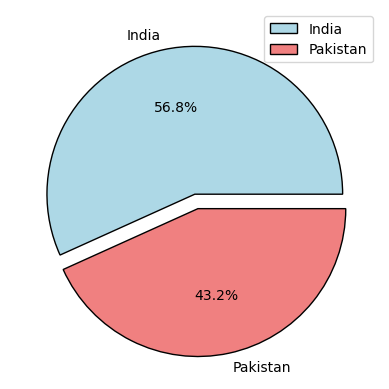

In [62]:
plt.pie(predicted_outcome[0], labels=['India', 'Pakistan'], autopct='%1.1f%%',explode = [0,0.1], colors=['lightblue', 'lightcoral'], wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.legend()
plt.show()

### T20 Data

In [63]:
df_t20.head(10)

,Team 1,Team 2,Winner,Margin,Ground,Match Date,match_id,Bat first,Pitch Advantage,Home Advantage
0,New Zealand,Australia,Australia,44 runs,Auckland,"Feb 17, 2005",T20I # 1,Australia,Batting,New Zealand
1,England,Australia,England,100 runs,Southampton,"Jun 13, 2005",T20I # 2,England,Balanced,England (United Kingdom)
2,South Africa,New Zealand,New Zealand,5 wickets,Johannesburg,"Oct 21, 2005",T20I # 3,South Africa,Batting,South Africa
3,Australia,South Africa,Australia,95 runs,Brisbane,"Jan 9, 2006",T20I # 4,Australia,Batting,Australia
5,South Africa,Australia,South Africa,2 runs,Johannesburg,"Feb 24, 2006",T20I # 6,South Africa,Batting,South Africa
6,England,Sri Lanka,Sri Lanka,2 runs,Southampton,"Jun 15, 2006",T20I # 7,Sri Lanka,Balanced,England (United Kingdom)
7,England,Pakistan,Pakistan,5 wickets,Bristol,"Aug 28, 2006",T20I # 8,England,Balanced,England (United Kingdom)
8,Bangladesh,Zimbabwe,Bangladesh,43 runs,Khulna,"Nov 28, 2006",T20I # 9,Bangladesh,Balanced,Bangladesh
9,South Africa,India,India,6 wickets,Johannesburg,"Dec 1, 2006",T20I # 10,South Africa,Batting,South Africa
10,New Zealand,Sri Lanka,Sri Lanka,18 runs,Wellington,"Dec 22, 2006",T20I # 11,Sri Lanka,Balanced,New Zealand


#### Gathering all the values with teams Team1(India) and Team2(Pakistan)

In [64]:
df_t20_rev = df_t20[
    ((df_t20['Team 1'] == 'India') & (df_t20['Team 2'] == 'Pakistan')) |
    ((df_t20['Team 1'] == 'Pakistan') & (df_t20['Team 2'] == 'India'))
]

In [65]:
df_t20_rev.head(10)

,Team 1,Team 2,Winner,Margin,Ground,Match Date,match_id,Bat first,Pitch Advantage,Home Advantage
45,India,Pakistan,India,5 runs,Johannesburg,"Sep 24, 2007",T20I # 46,India,Batting,South Africa
281,India,Pakistan,India,8 wickets,Colombo (RPS),"Sep 30, 2012",T20I # 282,Pakistan,Batting,Sri Lanka
295,India,Pakistan,Pakistan,5 wickets,Bengaluru,"Dec 25, 2012",T20I # 296,India,Balanced,India
297,India,Pakistan,India,11 runs,Ahmedabad,"Dec 28, 2012",T20I # 298,India,Balanced,India
377,India,Pakistan,India,7 wickets,Mirpur,"Mar 21, 2014",T20I # 378,Pakistan,Batting,Bangladesh
511,India,Pakistan,India,5 wickets,Mirpur,"Feb 27, 2016",T20I # 512,Pakistan,Batting,Bangladesh
540,India,Pakistan,India,6 wickets,Eden Gardens,"Mar 19, 2016",T20I # 541,Pakistan,Balanced,India
1360,India,Pakistan,Pakistan,10 wickets,Dubai (DSC),"Oct 24, 2021",T20I # 1361,India,Balanced,United Arab Emirates (UAE)
1749,India,Pakistan,India,5 wickets,Dubai (DSC),"Aug 28, 2022",T20I # 1750,Pakistan,Balanced,United Arab Emirates (UAE)
1757,India,Pakistan,Pakistan,5 wickets,Dubai (DSC),"Sep 4, 2022",T20I # 1758,India,Balanced,United Arab Emirates (UAE)


In [66]:
a = 'India'
b ='Pakistan'

#### Placing India in Team_1 and Pakistan in Team_2

In [67]:
df_t20_rev['Team 1'].replace({b:a},inplace=True)
df_t20_rev['Team 2'].replace({a:b},inplace=True)

C:\Users\vivek\AppData\Local\Temp\ipykernel_28504\2314359405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t20_rev['Team 1'].replace({b:a},inplace=True)
C:\Users\vivek\AppData\Local\Temp\ipykernel_28504\2314359405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t20_rev['Team 2'].replace({a:b},inplace=True)


In [68]:
df_t20_rev

,Team 1,Team 2,Winner,Margin,Ground,Match Date,match_id,Bat first,Pitch Advantage,Home Advantage
45,India,Pakistan,India,5 runs,Johannesburg,"Sep 24, 2007",T20I # 46,India,Batting,South Africa
281,India,Pakistan,India,8 wickets,Colombo (RPS),"Sep 30, 2012",T20I # 282,Pakistan,Batting,Sri Lanka
295,India,Pakistan,Pakistan,5 wickets,Bengaluru,"Dec 25, 2012",T20I # 296,India,Balanced,India
297,India,Pakistan,India,11 runs,Ahmedabad,"Dec 28, 2012",T20I # 298,India,Balanced,India
377,India,Pakistan,India,7 wickets,Mirpur,"Mar 21, 2014",T20I # 378,Pakistan,Batting,Bangladesh
511,India,Pakistan,India,5 wickets,Mirpur,"Feb 27, 2016",T20I # 512,Pakistan,Batting,Bangladesh
540,India,Pakistan,India,6 wickets,Eden Gardens,"Mar 19, 2016",T20I # 541,Pakistan,Balanced,India
1360,India,Pakistan,Pakistan,10 wickets,Dubai (DSC),"Oct 24, 2021",T20I # 1361,India,Balanced,United Arab Emirates (UAE)
1749,India,Pakistan,India,5 wickets,Dubai (DSC),"Aug 28, 2022",T20I # 1750,Pakistan,Balanced,United Arab Emirates (UAE)
1757,India,Pakistan,Pakistan,5 wickets,Dubai (DSC),"Sep 4, 2022",T20I # 1758,India,Balanced,United Arab Emirates (UAE)


#### Label India to 1 and Pakistan to 0 in the whole dataset

In [69]:
df_t20_rev['Team 1'].replace({a:0},inplace=True)
df_t20_rev['Team 2'].replace({b:1},inplace=True)
df_t20_rev['Winner'].replace({'India':0,'Pakistan':1},inplace=True)
df_t20_rev['Bat first'].replace({'India':0,'Pakistan':1},inplace=True)

C:\Users\vivek\AppData\Local\Temp\ipykernel_28504\3248415324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t20_rev['Team 1'].replace({a:0},inplace=True)
C:\Users\vivek\AppData\Local\Temp\ipykernel_28504\3248415324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t20_rev['Team 2'].replace({b:1},inplace=True)
C:\Users\vivek\AppData\Local\Temp\ipykernel_28504\3248415324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df

In [70]:
df_t20_rev.head(5)


,Team 1,Team 2,Winner,Margin,Ground,Match Date,match_id,Bat first,Pitch Advantage,Home Advantage
45,0,1,0,5 runs,Johannesburg,"Sep 24, 2007",T20I # 46,0,Batting,South Africa
281,0,1,0,8 wickets,Colombo (RPS),"Sep 30, 2012",T20I # 282,1,Batting,Sri Lanka
295,0,1,1,5 wickets,Bengaluru,"Dec 25, 2012",T20I # 296,0,Balanced,India
297,0,1,0,11 runs,Ahmedabad,"Dec 28, 2012",T20I # 298,0,Balanced,India
377,0,1,0,7 wickets,Mirpur,"Mar 21, 2014",T20I # 378,1,Batting,Bangladesh


In [71]:
df_t20_rev.shape

(11, 10)

In [72]:
df_t20_rev.columns

Index(['Team 1', 'Team 2', 'Winner', 'Margin', 'Ground', 'Match Date',
       'match_id', 'Bat first', 'Pitch Advantage ', 'Home Advantage'],
      dtype='object')

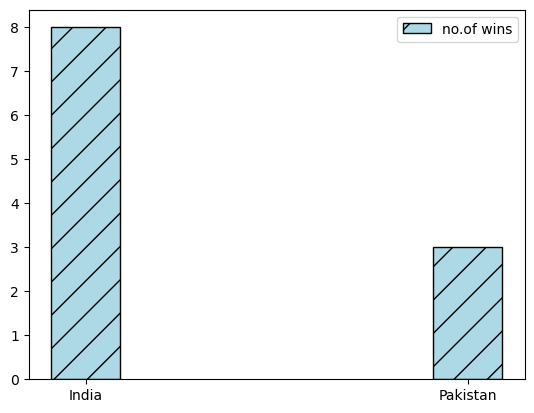

In [73]:
y = [(df_t20_rev['Winner']==0).sum(),(df_t20_rev['Winner']==1).sum()]
plt.bar(x=['India','Pakistan'],height = y ,hatch ='/',width = 0.18, color = 'lightblue',edgecolor = 'black',label = 'no.of wins')
plt.legend()
plt.show()

In [74]:
df_t20_rev['Pitch Advantage '].replace({"Batting":0},inplace=True)
df_t20_rev['Pitch Advantage '].replace({"Bowling":1},inplace=True)
df_t20_rev['Pitch Advantage '].replace({"Balanced":2},inplace=True)

df_t20_rev['Home Advantage'].replace({"India":0},inplace=True)
df_t20_rev['Home Advantage'].replace({"Pakistan":1},inplace=True)

C:\Users\vivek\AppData\Local\Temp\ipykernel_28504\3208868286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t20_rev['Pitch Advantage '].replace({"Batting":0},inplace=True)
C:\Users\vivek\AppData\Local\Temp\ipykernel_28504\3208868286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t20_rev['Pitch Advantage '].replace({"Bowling":1},inplace=True)
C:\Users\vivek\AppData\Local\Temp\ipykernel_28504\3208868286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [75]:
df_t20_rev['Home Advantage'] = df_t20_rev['Home Advantage'].apply(lambda x: 2 if x not in [0, 1] else x)

C:\Users\vivek\AppData\Local\Temp\ipykernel_28504\481429975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t20_rev['Home Advantage'] = df_t20_rev['Home Advantage'].apply(lambda x: 2 if x not in [0, 1] else x)


In [77]:
df_t20_rev.head(5)

,Team 1,Team 2,Winner,Margin,Ground,Match Date,match_id,Bat first,Pitch Advantage,Home Advantage
45,0,1,0,5 runs,Johannesburg,"Sep 24, 2007",T20I # 46,0,0,2
281,0,1,0,8 wickets,Colombo (RPS),"Sep 30, 2012",T20I # 282,1,0,2
295,0,1,1,5 wickets,Bengaluru,"Dec 25, 2012",T20I # 296,0,2,0
297,0,1,0,11 runs,Ahmedabad,"Dec 28, 2012",T20I # 298,0,2,0
377,0,1,0,7 wickets,Mirpur,"Mar 21, 2014",T20I # 378,1,0,2


In [78]:
from imblearn.over_sampling import SMOTE

In [95]:
smote = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=42)

### Feature Extraction 

In [96]:
X2 = df_t20_rev.iloc[:,[7,8,9]]
Y2 = df_t20_rev['Winner']

#### Splitting into training and test data

In [97]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.25, random_state=42)

In [98]:
X2_train.shape

(8, 3)

In [99]:
X2_train_resampled, Y2_train_resampled = smote.fit_resample(X2_train, Y2_train)

In [100]:
X2_train_resampled

,Bat first,Pitch Advantage,Home Advantage
0,1,2,2
1,0,2,0
2,1,0,2
3,1,2,2
4,1,0,2
5,0,2,2
6,0,2,0
7,1,2,0
8,0,2,1
9,0,2,0


In [102]:
Y2_train_resampled

0     0
1     1
2     0
3     0
4     0
5     1
6     0
7     0
8     1
9     1
10    1
11    1
Name: Winner, dtype: int64

### Scaling the data

In [103]:
scaler2 = StandardScaler()
X2_train = scaler2.fit_transform(X2_train_resampled)
X2_test = scaler2.transform(X2_test)

### Training the data using appropriate algorithms

In [134]:
best_params = {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

In [135]:
model2 = RandomForestClassifier(**best_params)

In [136]:
model2.fit(X2_train_resampled,Y2_train_resampled)

RandomForestClassifier(min_samples_leaf=4)

In [137]:
model2.score(X2_test,Y2_test)

C:\Users\vivek\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.6666666666666666

### Predicting for new data

In [147]:
new_data_2 = {'Bat first':1,'Pitch Advantage ':0,'Home Advantage':0}

In [148]:
df_2 = pd.DataFrame([new_data_2])

In [149]:
df_2

,Bat first,Pitch Advantage,Home Advantage
0,1,0,0


In [150]:
df_2

,Bat first,Pitch Advantage,Home Advantage
0,1,0,0


In [151]:
predicted_outcome_t20 = model1_1.predict_proba(df_2)

In [152]:
india_proba = predicted_outcome_t20[0][0]

In [153]:
india_proba

0.7820416664490831

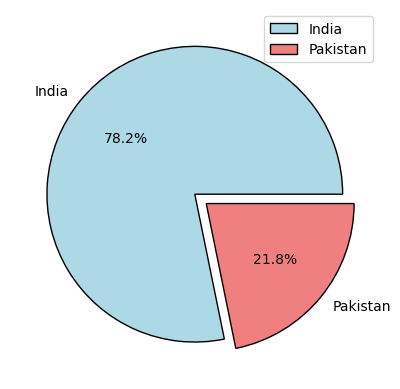

In [154]:
plt.pie(predicted_outcome_t20[0], labels=['India', 'Pakistan'], autopct='%1.1f%%',explode = [0,0.1], colors=['lightblue', 'lightcoral'], wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.legend()
plt.show()

##


## MODEL 2 - Players performance

### Batting

####

In [193]:
df_batting = pd.read_csv("ODI_batting.csv")

In [194]:
df_batting.head(10)

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Unnamed: 13
0,0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,NaN
1,1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,NaN
2,2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,NaN
3,3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34,NaN
4,4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,NaN
5,5,Inzamam-ul-Haq (Asia/PAK),1991-2007,378,350,53,11739,137*,39.52,15812,74.24,10,83,20,NaN
6,6,V Kohli (INDIA),2008-2019,242,233,39,11609,183,59.84,12445,93.28,43,55,13,NaN
7,7,JH Kallis (Afr/ICC/SA),1996-2014,328,314,53,11579,139,44.36,15885,72.89,17,86,17,NaN
8,8,SC Ganguly (Asia/INDIA),1992-2007,311,300,23,11363,183,41.02,15416,73.7,22,72,16,NaN
9,9,R Dravid (Asia/ICC/INDIA),1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13,NaN


In [195]:
def remove_paranthesis(text):
    return text.split('(')[0]

In [196]:
df_batting['Player'] = df_batting["Player"].apply(remove_paranthesis)

In [197]:
df_batting.head(10)

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Unnamed: 13
0,0,SR Tendulkar,1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,NaN
1,1,KC Sangakkara,2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,NaN
2,2,RT Ponting,1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,NaN
3,3,ST Jayasuriya,1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34,NaN
4,4,DPMD Jayawardene,1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,NaN
5,5,Inzamam-ul-Haq,1991-2007,378,350,53,11739,137*,39.52,15812,74.24,10,83,20,NaN
6,6,V Kohli,2008-2019,242,233,39,11609,183,59.84,12445,93.28,43,55,13,NaN
7,7,JH Kallis,1996-2014,328,314,53,11579,139,44.36,15885,72.89,17,86,17,NaN
8,8,SC Ganguly,1992-2007,311,300,23,11363,183,41.02,15416,73.7,22,72,16,NaN
9,9,R Dravid,1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13,NaN


In [198]:
df_batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2500 non-null   int64  
 1   Player       2500 non-null   object 
 2   Span         2500 non-null   object 
 3   Mat          2500 non-null   int64  
 4   Inns         2500 non-null   object 
 5   NO           2500 non-null   object 
 6   Runs         2500 non-null   object 
 7   HS           2500 non-null   object 
 8   Ave          2500 non-null   object 
 9   BF           2500 non-null   object 
 10  SR           2500 non-null   object 
 11  100          2500 non-null   object 
 12  50           2500 non-null   object 
 13  0            2500 non-null   object 
 14  Unnamed: 13  0 non-null      float64
dtypes: float64(1), int64(2), object(12)
memory usage: 293.1+ KB


In [199]:
df_batting.isnull().sum()

Unnamed: 0        0
Player            0
Span              0
Mat               0
Inns              0
NO                0
Runs              0
HS                0
Ave               0
BF                0
SR                0
100               0
50                0
0                 0
Unnamed: 13    2500
dtype: int64

In [200]:
df_batting.columns

Index(['Unnamed: 0', 'Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS',
       'Ave', 'BF', 'SR', '100', '50', '0', 'Unnamed: 13'],
      dtype='object')

In [201]:
df_batting[df_batting["Ave"]== "-"] 

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Unnamed: 13
1466,16,BT Foakes,2019-2019,1,1,1,61,61*,-,76,80.26,0,1,0,NaN
1493,43,BM Wheeler,2015-2015,6,4,4,58,39*,-,47,123.4,0,0,0,NaN
1508,8,FY Fazal,2016-2016,1,1,1,55,55*,-,61,90.16,0,1,0,NaN
1570,20,SS Tiwary,2010-2010,3,2,2,49,37*,-,56,87.5,0,0,0,NaN
1682,32,TS Roland-Jones,2017-2017,1,1,1,37,37*,-,37,100.0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,45,ZS Ansari,2015-2015,1,-,-,-,-,-,-,-,-,-,-,NaN
2496,46,Ariful Haque,2018-2018,1,-,-,-,-,-,-,-,-,-,-,NaN
2497,47,Ashfaq Ahmed,1994-1994,3,-,-,-,-,-,-,-,-,-,-,NaN
2498,48,MD Bailey,1998-1998,1,-,-,-,-,-,-,-,-,-,-,NaN


In [202]:
df_batting.replace('-',0,inplace=True)

In [203]:
df_batting[df_batting["Ave"]== "-"] 

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Unnamed: 13


In [204]:
df_batting.isnull().sum()

Unnamed: 0        0
Player            0
Span              0
Mat               0
Inns              0
NO                0
Runs              0
HS                0
Ave               0
BF                0
SR                0
100               0
50                0
0                 0
Unnamed: 13    2500
dtype: int64

In [205]:
df_batting.dropna()

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Unnamed: 13


In [206]:
df_batting.isnull().sum()

Unnamed: 0        0
Player            0
Span              0
Mat               0
Inns              0
NO                0
Runs              0
HS                0
Ave               0
BF                0
SR                0
100               0
50                0
0                 0
Unnamed: 13    2500
dtype: int64

In [207]:
df_batting.columns

Index(['Unnamed: 0', 'Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS',
       'Ave', 'BF', 'SR', '100', '50', '0', 'Unnamed: 13'],
      dtype='object')

In [208]:
df_batting.drop(columns = ["Unnamed: 13"],inplace = True)

In [209]:
df_batting.isnull().sum()

Unnamed: 0    0
Player        0
Span          0
Mat           0
Inns          0
NO            0
Runs          0
HS            0
Ave           0
BF            0
SR            0
100           0
50            0
0             0
dtype: int64

In [210]:
df_batting.drop(columns = ['Unnamed: 0'],inplace = True)

In [211]:
df_batting.replace(' ','_',inplace = True)

In [212]:
df_batting.head(5)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar,1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara,2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting,1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya,1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34
4,DPMD Jayawardene,1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [213]:
def replace_space(text):
    return text.replace(' ','_')

In [214]:
df_batting["Player"] = df_batting["Player"].apply(replace_space)

In [215]:
def split_under(text):
    return text[:-1]

In [216]:
df_batting["Player"] = df_batting["Player"].apply(split_under)

In [217]:
df_batting

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR_Tendulkar,1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC_Sangakkara,2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT_Ponting,1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST_Jayasuriya,1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34
4,DPMD_Jayawardene,1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,ZS_Ansari,2015-2015,1,0,0,0,0,0,0,0,0,0,0
2496,Ariful_Haque,2018-2018,1,0,0,0,0,0,0,0,0,0,0
2497,Ashfaq_Ahmed,1994-1994,3,0,0,0,0,0,0,0,0,0,0
2498,MD_Bailey,1998-1998,1,0,0,0,0,0,0,0,0,0,0


In [218]:
df_batting_dummies = pd.get_dummies(df_batting.Player)
df_batting_dummies.columns

Index(['AAW_Gunawardena', 'AA_Donald', 'AA_Mallett', 'AA_Mulla', 'AA_Obanda',
       'AB_Agarkar', 'AB_Barath', 'AB_Dinda', 'AB_de_Villiers', 'ACI_Lock',
       ...
       'Zakir_Hossain', 'Zakir_Khan', 'Zakiullah_Zaki', 'Zeeshan_Maqsood',
       'Zeeshan_Siddiqi', 'Ziaur_Rahman', 'Zulfiqar_Ali', 'Zulfiqar_Babar',
       'Zulqarnain', 'Zulqarnain_Haider'],
      dtype='object', length=2491)

In [219]:
df_batting_dummies

,AAW_Gunawardena,AA_Donald,AA_Mallett,AA_Mulla,AA_Obanda,AB_Agarkar,AB_Barath,AB_Dinda,AB_de_Villiers,ACI_Lock,...,Zakir_Hossain,Zakir_Khan,Zakiullah_Zaki,Zeeshan_Maqsood,Zeeshan_Siddiqi,Ziaur_Rahman,Zulfiqar_Ali,Zulfiqar_Babar,Zulqarnain,Zulqarnain_Haider
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [220]:
col = df_batting_dummies.columns

In [221]:
def replace_bool(text):
    if text == False:
        return 0
    return 1

In [222]:
for i in col:
    df_batting_dummies[i]= df_batting_dummies[i].apply(replace_bool)

In [223]:
df_batting_dummies.SR_Tendulkar

0       1
1       0
2       0
3       0
4       0
       ..
2495    0
2496    0
2497    0
2498    0
2499    0
Name: SR_Tendulkar, Length: 2500, dtype: int64

In [224]:
df_batting["Run"] = df_batting["Runs"].astype(int)//df_batting["Inns"].astype(int)

In [225]:
df_batting.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Run
0,SR_Tendulkar,1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,40.0
1,KC_Sangakkara,2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,37.0
2,RT_Ponting,1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,37.0
3,ST_Jayasuriya,1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34,31.0
4,DPMD_Jayawardene,1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,30.0


In [226]:
df_batting.isnull().sum()

Player     0
Span       0
Mat        0
Inns       0
NO         0
Runs       0
HS         0
Ave        0
BF         0
SR         0
100        0
50         0
0          0
Run       10
dtype: int64

In [227]:
df_batting.dropna(inplace = True)

In [228]:
df_batting.tail()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Run
2485,Tanvir_Mehdi,1992-1992,1,1,0,0,0,0.00,5,0.00,0,0,1,0.0
2486,M_Venkataramana,1988-1988,1,1,1,0,0*,0,0,0,0,0,0,0.0
2487,R_Walters,2003-2003,2,2,0,0,0,0.00,5,0.00,0,0,2,0.0
2488,CM_Willoughby,2000-2003,3,2,0,0,0,0.00,4,0.00,0,0,2,0.0
2489,Zakir_Hossain,1998-1998,1,1,0,0,0,0.00,1,0.00,0,0,1,0.0


In [229]:
df_batting_1 = pd.concat([df_batting,df_batting_dummies],axis = 'columns')

In [230]:
df_batting_1.tail(5)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,...,Zakir_Hossain,Zakir_Khan,Zakiullah_Zaki,Zeeshan_Maqsood,Zeeshan_Siddiqi,Ziaur_Rahman,Zulfiqar_Ali,Zulfiqar_Babar,Zulqarnain,Zulqarnain_Haider
2495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [231]:
df_batting_1.dropna(inplace = True)

In [232]:
df_batting_2 = df_batting_1.drop(columns = ["Player"])

In [233]:
df_batting_2.head()

,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,...,Zakir_Hossain,Zakir_Khan,Zakiullah_Zaki,Zeeshan_Maqsood,Zeeshan_Siddiqi,Ziaur_Rahman,Zulfiqar_Ali,Zulfiqar_Babar,Zulqarnain,Zulqarnain_Haider
0,1989-2012,463.0,452,41,18426,200*,44.83,21367,86.23,49,...,0,0,0,0,0,0,0,0,0,0
1,2000-2015,404.0,380,41,14234,169,41.98,18048,78.86,25,...,0,0,0,0,0,0,0,0,0,0
2,1995-2012,375.0,365,39,13704,164,42.03,17046,80.39,30,...,0,0,0,0,0,0,0,0,0,0
3,1989-2011,445.0,433,18,13430,189,32.36,14725,91.2,28,...,0,0,0,0,0,0,0,0,0,0
4,1998-2015,448.0,418,39,12650,144,33.37,16020,78.96,19,...,0,0,0,0,0,0,0,0,0,0


In [234]:
def convert(text):
    return float(text)

In [235]:
lst = ['Ave','Runs','SR']

In [236]:
for i in lst:
    df_batting_2[i] = df_batting_2[i].apply(convert)

In [237]:
min_max_values =[]
for i in lst:
    min_max_values.append(list((df_batting_2[i].min(),df_batting_2[i].max())))

In [238]:
for i in lst:
    df_batting_2[i] = (df_batting_2[i]-df_batting_2[i].min())/(df_batting_2[i].max()-df_batting_2[i].min())

In [239]:
df_batting_2['Run'] = (df_batting_2['Run']-df_batting_2['Run'].min())/(df_batting_2['Run'].max()-df_batting_2['Run'].min())

In [240]:
X = df_batting_2.drop(columns = ["Span",'Mat','Inns','BF','HS','NO','Run','100','50','0'])

In [241]:
Y = df_batting_2['Run']

In [242]:
X.shape

(2490, 2494)

In [243]:
Y.shape

(2490,)

In [244]:
Y

0       0.476190
1       0.440476
2       0.440476
3       0.369048
4       0.357143
          ...   
2485    0.000000
2486    0.000000
2487    0.000000
2488    0.000000
2489    0.000000
Name: Run, Length: 2490, dtype: float64

In [245]:
df_batting_2

,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,...,Zakir_Hossain,Zakir_Khan,Zakiullah_Zaki,Zeeshan_Maqsood,Zeeshan_Siddiqi,Ziaur_Rahman,Zulfiqar_Ali,Zulfiqar_Babar,Zulqarnain,Zulqarnain_Haider
0,1989-2012,463.0,452,41,1.000000,200*,0.309172,21367,0.262440,49,...,0,0,0,0,0,0,0,0,0,0
1,2000-2015,404.0,380,41,0.772495,169,0.289517,18048,0.240010,25,...,0,0,0,0,0,0,0,0,0,0
2,1995-2012,375.0,365,39,0.743732,164,0.289862,17046,0.244666,30,...,0,0,0,0,0,0,0,0,0,0
3,1989-2011,445.0,433,18,0.728861,189,0.223172,14725,0.277566,28,...,0,0,0,0,0,0,0,0,0,0
4,1998-2015,448.0,418,39,0.686530,144,0.230138,16020,0.240314,19,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,1992-1992,1.0,1,0,0.000000,0,0.000000,5,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
2486,1988-1988,1.0,1,1,0.000000,0*,0.000000,0,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
2487,2003-2003,2.0,2,0,0.000000,0,0.000000,5,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
2488,2000-2003,3.0,2,0,0.000000,0,0.000000,4,0.000000,0,...,0,0,0,0,0,0,0,0,0,0


In [246]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y , test_size = 0.2 ,random_state = 10)

In [247]:
X_train.shape

(1992, 2494)

In [248]:
lr_batting = LinearRegression()

In [249]:
lr_batting.fit(X_train, Y_train)

LinearRegression()

In [250]:
lr_batting.score(X_test, Y_test)

-5.05994494698189e+24

In [251]:
random_forest2 = RandomForestRegressor(n_estimators=100, random_state=0)

In [252]:
random_forest2.fit(X_train,Y_train)

RandomForestRegressor(random_state=0)

In [253]:
random_forest2.score(X_test,Y_test)

0.870162811833417

In [254]:
data_train = pd.concat([X_train, Y_train], axis=1)
data_train.head()

,Runs,Ave,SR,AAW_Gunawardena,AA_Donald,AA_Mallett,AA_Mulla,AA_Obanda,AB_Agarkar,AB_Barath,...,Zakir_Khan,Zakiullah_Zaki,Zeeshan_Maqsood,Zeeshan_Siddiqi,Ziaur_Rahman,Zulfiqar_Ali,Zulfiqar_Babar,Zulqarnain,Zulqarnain_Haider,Run
739,0.018289,0.178759,0.208875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.178571
898,0.012808,0.232483,0.191527,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.392857
1795,0.001465,0.093103,0.152175,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.107143
1476,0.003256,0.059103,0.140457,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.071429
1088,0.007707,0.057586,0.164318,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.071429


In [255]:
print(type(data_train['Ave'][0]))

<class 'numpy.float64'>


In [256]:
X_train.columns

Index(['Runs', 'Ave', 'SR', 'AAW_Gunawardena', 'AA_Donald', 'AA_Mallett',
       'AA_Mulla', 'AA_Obanda', 'AB_Agarkar', 'AB_Barath',
       ...
       'Zakir_Hossain', 'Zakir_Khan', 'Zakiullah_Zaki', 'Zeeshan_Maqsood',
       'Zeeshan_Siddiqi', 'Ziaur_Rahman', 'Zulfiqar_Ali', 'Zulfiqar_Babar',
       'Zulqarnain', 'Zulqarnain_Haider'],
      dtype='object', length=2494)

In [257]:
import statsmodels.formula.api as smf

In [259]:
lm1 = smf.ols(formula= 'Run ~ Ave+Runs+SR', data = data_train).fit()
lm1.params

Intercept   -0.000575
Ave          1.329483
Runs         0.090501
SR           0.034544
dtype: float64

In [260]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Run   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     3161.
Date:                Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:43:06   Log-Likelihood:                 2958.3
No. Observations:                1992   AIC:                            -5909.
Df Residuals:                    1988   BIC:                            -5886.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0006      0.003     -0.182      0.856      -0.007       0.006
Ave            1.3295      0.018     74.419      0.000       1.294       1.365
Runs           0.0905      0.017      5.479      0.000       0.058       0.123
SR             0.0345      0.016      2.108      0.035       0.002       0.067
==============================================================================
Omnibus:                     1167.914   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79644.304
Skew:                           1.956   Prob(JB):                         0.00
Kurtosis:                      33.729   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [261]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [262]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(RandomForestRegressor(n_estimators=100, random_state=0), X, Y, cv=cv)

array([0.8703017 , 0.81475761, 0.85699243, 0.85412977, 0.80518303])

In [285]:
def predict_no_of_runs(Player, Runs,Avg, SR):    
    loc_index = np.where(X.columns==Player)[0][0]
    
    Runs = (Runs-min_max_values[1][0])/(min_max_values[1][1]-min_max_values[1][0])
    Avg = (Avg-min_max_values[0][0])/(min_max_values[0][1]-min_max_values[0][0])
    SR = (SR-min_max_values[2][0])/(min_max_values[2][1]-min_max_values[2][0])

    x = np.zeros(len(X.columns))
    x[0] = Runs
    x[1] = Avg
    x[2] = SR
    if loc_index >= 0:
        x[loc_index] = 1
    return random_forest2.predict([x])[0]

In [270]:
name_player = input("Enter player name : ")

Enter player name : V_Kohli


In [271]:
row = df_batting[df_batting['Player'] == name_player]

In [272]:
print(row)

    Player       Span  Mat Inns  NO   Runs   HS    Ave     BF     SR 100  50  \
6  V_Kohli  2008-2019  242  233  39  11609  183  59.84  12445  93.28  43  55   

    0   Run  
6  13  49.0  


In [273]:
float(row['SR'])



C:\Users\vivek\AppData\Local\Temp\ipykernel_25832\1836616138.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SR'])


93.28

In [306]:
run = predict_no_of_runs(name_player , 20000,62,92)

C:\Users\vivek\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [307]:
print(run)

0.5719047619047624


In [318]:
import pickle
with open('odi_individual.pickle','wb') as f:
    pickle.dump(random_forest2,f)

In [315]:
col = list(X.columns)
with open('odi_batting_columns.pickle','wb') as f:
    pickle.dump(col,f)
    pickle.dump(min_max_values,f)

## Testing 

In [316]:
import pickle as pk

In [319]:
with open('odi_individual.pickle','rb') as f:
    mo = pk.load(f)

In [320]:
print(mo)

RandomForestRegressor(random_state=0)


In [321]:
with open('odi_batting_columns.pickle','rb') as f:
    col = pk.load(f)
    min_max2 = pk.load(f)

In [322]:
col = pd.Series(col)

In [323]:
col = list(col)

In [324]:
min_max2

[[0.0, 145.0], [0.0, 18426.0], [0.0, 328.57]]

In [329]:
def predict_no_of_runs(Player, Runs,Avg, SR):    
    loc_index = col.index(Player)
    
    Runs = (Runs-min_max2[1][0])/(min_max2[1][1]-min_max2[1][0])
    Avg = (Avg-min_max2[0][0])/(min_max2[0][1]-min_max2[0][0])
    SR = (SR-min_max2[2][0])/(min_max2[2][1]-min_max2[2][0])
    
    x = np.zeros(len(col))
    x[0] = Runs
    x[1] = Avg
    x[2] = SR
    if loc_index >= 0:
        x[loc_index] = 1
    return mo.predict([x])[0]

In [330]:
name_player = input("Enter player name : ")

Enter player name : V_Kohli


In [331]:
run = predict_no_of_runs(name_player , 15000,60 , 95)

C:\Users\vivek\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [332]:
print(run)

0.5666666666666671


### Bowling 

In [333]:
df_bowling = pd.read_csv("ODI_bowling.csv")

In [334]:
df_bowling.head(10)

,Unnamed: 0,Player,Span,Mat,Inns,Balls,Runs,Wkts,BBI,Ave,Econ,SR,4,5,Unnamed: 13
0,0,M Muralitharan (Asia/ICC/SL),1993-2011,350,341,18811,12326,534,7/30,23.08,3.93,35.2,15,10,NaN
1,1,Wasim Akram (PAK),1984-2003,356,351,18186,11812,502,5/15,23.52,3.89,36.2,17,6,NaN
2,2,Waqar Younis (PAK),1989-2003,262,258,12698,9919,416,7/36,23.84,4.68,30.5,14,13,NaN
3,3,WPUJC Vaas (Asia/SL),1994-2008,322,320,15775,11014,400,8/19,27.53,4.18,39.4,9,4,NaN
4,4,Shahid Afridi (Asia/ICC/PAK),1996-2015,398,372,17670,13632,395,7/12,34.51,4.62,44.7,4,9,NaN
5,5,SM Pollock (Afr/ICC/SA),1996-2008,303,297,15712,9631,393,6/35,24.5,3.67,39.9,12,5,NaN
6,6,GD McGrath (AUS/ICC),1993-2007,250,248,12970,8391,381,7/15,22.02,3.88,34.0,9,7,NaN
7,7,B Lee (AUS),2000-2012,221,217,11185,8877,380,5/22,23.36,4.76,29.4,14,9,NaN
8,8,SL Malinga (SL),2004-2019,226,220,10936,9760,338,6/38,28.87,5.35,32.3,11,8,NaN
9,9,A Kumble (Asia/INDIA),1990-2007,271,265,14496,10412,337,6/12,30.89,4.3,43.0,8,2,NaN


In [336]:
def remove_paranthesis(text):
    return text.split('(')[0]

In [337]:
df_bowling['Player'] = df_bowling["Player"].apply(remove_paranthesis)

In [338]:
df_bowling.head(10)

,Unnamed: 0,Player,Span,Mat,Inns,Balls,Runs,Wkts,BBI,Ave,Econ,SR,4,5,Unnamed: 13
0,0,M Muralitharan,1993-2011,350,341,18811,12326,534,7/30,23.08,3.93,35.2,15,10,NaN
1,1,Wasim Akram,1984-2003,356,351,18186,11812,502,5/15,23.52,3.89,36.2,17,6,NaN
2,2,Waqar Younis,1989-2003,262,258,12698,9919,416,7/36,23.84,4.68,30.5,14,13,NaN
3,3,WPUJC Vaas,1994-2008,322,320,15775,11014,400,8/19,27.53,4.18,39.4,9,4,NaN
4,4,Shahid Afridi,1996-2015,398,372,17670,13632,395,7/12,34.51,4.62,44.7,4,9,NaN
5,5,SM Pollock,1996-2008,303,297,15712,9631,393,6/35,24.5,3.67,39.9,12,5,NaN
6,6,GD McGrath,1993-2007,250,248,12970,8391,381,7/15,22.02,3.88,34.0,9,7,NaN
7,7,B Lee,2000-2012,221,217,11185,8877,380,5/22,23.36,4.76,29.4,14,9,NaN
8,8,SL Malinga,2004-2019,226,220,10936,9760,338,6/38,28.87,5.35,32.3,11,8,NaN
9,9,A Kumble,1990-2007,271,265,14496,10412,337,6/12,30.89,4.3,43.0,8,2,NaN


In [339]:
df_bowling.isnull().sum()

Unnamed: 0        0
Player            0
Span              0
Mat               0
Inns              0
Balls             0
Runs              0
Wkts              0
BBI               0
Ave               0
Econ              0
SR                0
4                 0
5                 0
Unnamed: 13    2582
dtype: int64

In [340]:
df_bowling.drop(columns = ["Unnamed: 13",'Unnamed: 0'], inplace =True)

In [341]:
df_bowling.head(10)

,Player,Span,Mat,Inns,Balls,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,M Muralitharan,1993-2011,350,341,18811,12326,534,7/30,23.08,3.93,35.2,15,10
1,Wasim Akram,1984-2003,356,351,18186,11812,502,5/15,23.52,3.89,36.2,17,6
2,Waqar Younis,1989-2003,262,258,12698,9919,416,7/36,23.84,4.68,30.5,14,13
3,WPUJC Vaas,1994-2008,322,320,15775,11014,400,8/19,27.53,4.18,39.4,9,4
4,Shahid Afridi,1996-2015,398,372,17670,13632,395,7/12,34.51,4.62,44.7,4,9
5,SM Pollock,1996-2008,303,297,15712,9631,393,6/35,24.5,3.67,39.9,12,5
6,GD McGrath,1993-2007,250,248,12970,8391,381,7/15,22.02,3.88,34.0,9,7
7,B Lee,2000-2012,221,217,11185,8877,380,5/22,23.36,4.76,29.4,14,9
8,SL Malinga,2004-2019,226,220,10936,9760,338,6/38,28.87,5.35,32.3,11,8
9,A Kumble,1990-2007,271,265,14496,10412,337,6/12,30.89,4.3,43.0,8,2


In [342]:
df_bowling[df_bowling["Ave"]== "-"] 

,Player,Span,Mat,Inns,Balls,Runs,Wkts,BBI,Ave,Econ,SR,4,5
1596,Aarif Sheikh,2018-2019,6,1,12,10,0,-,-,5.0,-,0,0
1597,S Abrahams,2000-2000,1,1,60,40,0,-,-,4.0,-,0,0
1598,Abul Hasan,2012-2018,7,7,216,244,0,-,-,6.77,-,0,0
1599,FS Ahangama,1985-1985,1,1,18,23,0,-,-,7.66,-,0,0
1600,Ahmed Shah,2009-2009,1,1,6,12,0,-,-,12.0,-,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,TJ Zoehrer,1986-1994,22,-,-,-,-,-,-,-,-,-,-
2578,K Zondo,2018-2018,5,-,-,-,-,-,-,-,-,-,-
2579,B Zuiderent,1996-2011,57,-,-,-,-,-,-,-,-,-,-
2580,Zulqarnain,1985-1989,16,-,-,-,-,-,-,-,-,-,-


In [343]:
df_bowling = df_bowling.replace('-',np.nan)

In [344]:
df_bowling.isnull().sum()

Player      0
Span        0
Mat         0
Inns      709
Balls     709
Runs      709
Wkts      709
BBI       986
Ave       986
Econ      709
SR        986
4         709
5         709
dtype: int64

In [345]:
df_bowling.dropna(inplace = True)

In [346]:
df_bowling

,Player,Span,Mat,Inns,Balls,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,M Muralitharan,1993-2011,350,341,18811,12326,534,7/30,23.08,3.93,35.2,15,10
1,Wasim Akram,1984-2003,356,351,18186,11812,502,5/15,23.52,3.89,36.2,17,6
2,Waqar Younis,1989-2003,262,258,12698,9919,416,7/36,23.84,4.68,30.5,14,13
3,WPUJC Vaas,1994-2008,322,320,15775,11014,400,8/19,27.53,4.18,39.4,9,4
4,Shahid Afridi,1996-2015,398,372,17670,13632,395,7/12,34.51,4.62,44.7,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,J Yadav,2016-2016,1,1,24,8,1,1/8,8.00,2.0,24.0,0,0
1592,Yashpal Sharma,1978-1985,42,8,201,199,1,1/27,199.00,5.94,201.0,0,0
1593,BE Young,1998-1999,6,5,234,251,1,1/26,251.00,6.43,234.0,0,0
1594,Zain Abbas,2008-2008,1,1,36,56,1,1/56,56.00,9.33,36.0,0,0


In [347]:
def replace_space(text):
    return text.replace(' ','_')

In [348]:
df_bowling["Player"] = df_bowling["Player"].apply(replace_space)

In [349]:
df_bowling

,Player,Span,Mat,Inns,Balls,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,M_Muralitharan_,1993-2011,350,341,18811,12326,534,7/30,23.08,3.93,35.2,15,10
1,Wasim_Akram_,1984-2003,356,351,18186,11812,502,5/15,23.52,3.89,36.2,17,6
2,Waqar_Younis_,1989-2003,262,258,12698,9919,416,7/36,23.84,4.68,30.5,14,13
3,WPUJC_Vaas_,1994-2008,322,320,15775,11014,400,8/19,27.53,4.18,39.4,9,4
4,Shahid_Afridi_,1996-2015,398,372,17670,13632,395,7/12,34.51,4.62,44.7,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,J_Yadav_,2016-2016,1,1,24,8,1,1/8,8.00,2.0,24.0,0,0
1592,Yashpal_Sharma_,1978-1985,42,8,201,199,1,1/27,199.00,5.94,201.0,0,0
1593,BE_Young_,1998-1999,6,5,234,251,1,1/26,251.00,6.43,234.0,0,0
1594,Zain_Abbas_,2008-2008,1,1,36,56,1,1/56,56.00,9.33,36.0,0,0


In [350]:
def split_under(text):
    return text[:-1]

In [351]:
df_bowling["Player"] = df_bowling["Player"].apply(split_under)

In [352]:
df_bowling.head()

,Player,Span,Mat,Inns,Balls,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,M_Muralitharan,1993-2011,350,341,18811,12326,534,7/30,23.08,3.93,35.2,15,10
1,Wasim_Akram,1984-2003,356,351,18186,11812,502,5/15,23.52,3.89,36.2,17,6
2,Waqar_Younis,1989-2003,262,258,12698,9919,416,7/36,23.84,4.68,30.5,14,13
3,WPUJC_Vaas,1994-2008,322,320,15775,11014,400,8/19,27.53,4.18,39.4,9,4
4,Shahid_Afridi,1996-2015,398,372,17670,13632,395,7/12,34.51,4.62,44.7,4,9


In [353]:
df_bowling_dummies = pd.get_dummies(df_bowling.Player)
df_bowling_dummies.columns

Index(['AA_Donald', 'AA_Mallett', 'AA_Noffke', 'AB_Agarkar', 'AB_Dinda',
       'AB_de_Villiers', 'ACI_Lock', 'AC_Agar', 'AC_Botha', 'AC_Cummins',
       ...
       'Zahid_Hussain', 'Zahid_Shah', 'Zahir_Khan', 'Zahoor_Khan',
       'Zain_Abbas', 'Zakir_Khan', 'Zeeshan_Maqsood', 'Ziaur_Rahman',
       'Zulfiqar_Ali', 'Zulfiqar_Babar'],
      dtype='object', length=1593)

In [354]:
df_bowling_dummies

,AA_Donald,AA_Mallett,AA_Noffke,AB_Agarkar,AB_Dinda,AB_de_Villiers,ACI_Lock,AC_Agar,AC_Botha,AC_Cummins,...,Zahid_Hussain,Zahid_Shah,Zahir_Khan,Zahoor_Khan,Zain_Abbas,Zakir_Khan,Zeeshan_Maqsood,Ziaur_Rahman,Zulfiqar_Ali,Zulfiqar_Babar
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1592,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1593,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1594,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [355]:
col = df_bowling_dummies.columns

In [356]:
def replace_bool(text):
    if text == False:
        return 0
    return 1

In [357]:
for i in col:
    df_bowling_dummies[i]= df_bowling_dummies[i].apply(replace_bool)

In [358]:
df_bowling_dummies.M_Muralitharan

0       1
1       0
2       0
3       0
4       0
       ..
1591    0
1592    0
1593    0
1594    0
1595    0
Name: M_Muralitharan, Length: 1596, dtype: int64

In [359]:
def convert(text):
    return float(text)

In [360]:
lst = ['Wkts','Ave','Econ']

In [361]:
for i in lst:
    df_bowling[i] = df_bowling[i].apply(convert)

In [362]:
columns_to_normalize = ['Wkts','Ave','Econ']

In [363]:
min_max_values =[]
for i in columns_to_normalize:
    min_max_values.append(list((df_bowling[i].min(),df_bowling[i].max())))
    

In [364]:
min_max_values

[[1.0, 534.0], [1.0, 251.0], [1.33, 13.9]]

In [365]:
for column in columns_to_normalize:
    df_bowling[column] = (df_bowling[column] - df_bowling[column].min()) / (df_bowling[column].max() - df_bowling[column].min())

In [366]:
weight_wickets = 0.4
weight_bowling_average = 0.3
weight_economy_rate = 0.3

In [367]:
df_bowling['Performance_Metric'] = ( weight_wickets * df_bowling['Wkts'] + weight_bowling_average * (1 - df_bowling['Ave']) + weight_economy_rate * (1 - df_bowling['Econ']) )

In [368]:
df_bowling


,Player,Span,Mat,Inns,Balls,Runs,Wkts,BBI,Ave,Econ,SR,4,5,Performance_Metric
0,M_Muralitharan,1993-2011,350,341,18811,12326,1.000000,7/30,0.08832,0.206842,35.2,15,10,0.911451
1,Wasim_Akram,1984-2003,356,351,18186,11812,0.939962,5/15,0.09008,0.203660,36.2,17,6,0.887863
2,Waqar_Younis,1989-2003,262,258,12698,9919,0.778612,7/36,0.09136,0.266508,30.5,14,13,0.804084
3,WPUJC_Vaas,1994-2008,322,320,15775,11014,0.748593,8/19,0.10612,0.226730,39.4,9,4,0.799582
4,Shahid_Afridi,1996-2015,398,372,17670,13632,0.739212,7/12,0.13404,0.261734,44.7,4,9,0.776953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,J_Yadav,2016-2016,1,1,24,8,0.000000,1/8,0.02800,0.053302,24.0,0,0,0.575610
1592,Yashpal_Sharma,1978-1985,42,8,201,199,0.000000,1/27,0.79200,0.366746,201.0,0,0,0.252376
1593,BE_Young,1998-1999,6,5,234,251,0.000000,1/26,1.00000,0.405728,234.0,0,0,0.178282
1594,Zain_Abbas,2008-2008,1,1,36,56,0.000000,1/56,0.22000,0.636436,36.0,0,0,0.343069


In [369]:
df_bowling_1 = pd.concat([df_bowling,df_bowling_dummies],axis = 'columns')

In [370]:
df_bowling_1.tail()

,Player,Span,Mat,Inns,Balls,Runs,Wkts,BBI,Ave,Econ,...,Zahid_Hussain,Zahid_Shah,Zahir_Khan,Zahoor_Khan,Zain_Abbas,Zakir_Khan,Zeeshan_Maqsood,Ziaur_Rahman,Zulfiqar_Ali,Zulfiqar_Babar
1591,J_Yadav,2016-2016,1,1,24,8,0.0,1/8,0.028,0.053302,...,0,0,0,0,0,0,0,0,0,0
1592,Yashpal_Sharma,1978-1985,42,8,201,199,0.0,1/27,0.792,0.366746,...,0,0,0,0,0,0,0,0,0,0
1593,BE_Young,1998-1999,6,5,234,251,0.0,1/26,1.000,0.405728,...,0,0,0,0,0,0,0,0,0,0
1594,Zain_Abbas,2008-2008,1,1,36,56,0.0,1/56,0.220,0.636436,...,0,0,0,0,1,0,0,0,0,0
1595,AK_Zesers,1987-1987,2,2,90,74,0.0,1/37,0.292,0.286396,...,0,0,0,0,0,0,0,0,0,0


In [371]:
df_bowling_1.dropna(inplace = True)

In [372]:
df_bowling_1.tail()

,Player,Span,Mat,Inns,Balls,Runs,Wkts,BBI,Ave,Econ,...,Zahid_Hussain,Zahid_Shah,Zahir_Khan,Zahoor_Khan,Zain_Abbas,Zakir_Khan,Zeeshan_Maqsood,Ziaur_Rahman,Zulfiqar_Ali,Zulfiqar_Babar
1591,J_Yadav,2016-2016,1,1,24,8,0.0,1/8,0.028,0.053302,...,0,0,0,0,0,0,0,0,0,0
1592,Yashpal_Sharma,1978-1985,42,8,201,199,0.0,1/27,0.792,0.366746,...,0,0,0,0,0,0,0,0,0,0
1593,BE_Young,1998-1999,6,5,234,251,0.0,1/26,1.000,0.405728,...,0,0,0,0,0,0,0,0,0,0
1594,Zain_Abbas,2008-2008,1,1,36,56,0.0,1/56,0.220,0.636436,...,0,0,0,0,1,0,0,0,0,0
1595,AK_Zesers,1987-1987,2,2,90,74,0.0,1/37,0.292,0.286396,...,0,0,0,0,0,0,0,0,0,0


In [373]:
df_bowling_2 = df_bowling_1.drop(columns = ["Player"])

In [374]:
df_bowling_2

,Span,Mat,Inns,Balls,Runs,Wkts,BBI,Ave,Econ,SR,...,Zahid_Hussain,Zahid_Shah,Zahir_Khan,Zahoor_Khan,Zain_Abbas,Zakir_Khan,Zeeshan_Maqsood,Ziaur_Rahman,Zulfiqar_Ali,Zulfiqar_Babar
0,1993-2011,350,341,18811,12326,1.000000,7/30,0.08832,0.206842,35.2,...,0,0,0,0,0,0,0,0,0,0
1,1984-2003,356,351,18186,11812,0.939962,5/15,0.09008,0.203660,36.2,...,0,0,0,0,0,0,0,0,0,0
2,1989-2003,262,258,12698,9919,0.778612,7/36,0.09136,0.266508,30.5,...,0,0,0,0,0,0,0,0,0,0
3,1994-2008,322,320,15775,11014,0.748593,8/19,0.10612,0.226730,39.4,...,0,0,0,0,0,0,0,0,0,0
4,1996-2015,398,372,17670,13632,0.739212,7/12,0.13404,0.261734,44.7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,2016-2016,1,1,24,8,0.000000,1/8,0.02800,0.053302,24.0,...,0,0,0,0,0,0,0,0,0,0
1592,1978-1985,42,8,201,199,0.000000,1/27,0.79200,0.366746,201.0,...,0,0,0,0,0,0,0,0,0,0
1593,1998-1999,6,5,234,251,0.000000,1/26,1.00000,0.405728,234.0,...,0,0,0,0,0,0,0,0,0,0
1594,2008-2008,1,1,36,56,0.000000,1/56,0.22000,0.636436,36.0,...,0,0,0,0,1,0,0,0,0,0


In [375]:
X = df_bowling_2.drop(columns = ['Performance_Metric',"Span",'Mat','Inns','Balls','Runs','BBI','SR','4','5'])

In [376]:
X.shape

(1596, 1596)

In [377]:
X.columns

Index(['Wkts', 'Ave', 'Econ', 'AA_Donald', 'AA_Mallett', 'AA_Noffke',
       'AB_Agarkar', 'AB_Dinda', 'AB_de_Villiers', 'ACI_Lock',
       ...
       'Zahid_Hussain', 'Zahid_Shah', 'Zahir_Khan', 'Zahoor_Khan',
       'Zain_Abbas', 'Zakir_Khan', 'Zeeshan_Maqsood', 'Ziaur_Rahman',
       'Zulfiqar_Ali', 'Zulfiqar_Babar'],
      dtype='object', length=1596)

In [378]:
Y = df_bowling_2['Performance_Metric']

In [379]:
Y

0       0.911451
1       0.887863
2       0.804084
3       0.799582
4       0.776953
          ...   
1591    0.575610
1592    0.252376
1593    0.178282
1594    0.343069
1595    0.426481
Name: Performance_Metric, Length: 1596, dtype: float64

In [380]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y , test_size = 0.2 ,random_state = 10)

In [381]:
lr_bowling = LinearRegression()

In [382]:
lr_bowling.fit(X_train,Y_train)

LinearRegression()

In [384]:
lr_bowling.score(X_test,Y_test)

0.9299076572697723

In [408]:
random_forest22 = RandomForestRegressor(n_estimators=100, random_state=0)

In [409]:
random_forest22.fit(X_train,Y_train)

RandomForestRegressor(random_state=0)

In [410]:
random_forest22.score(X_test,Y_test)

0.9848142300778182

In [411]:
data_train = pd.concat([X_train, Y_train], axis=1)
data_train.head()

,Wkts,Ave,Econ,AA_Donald,AA_Mallett,AA_Noffke,AB_Agarkar,AB_Dinda,AB_de_Villiers,ACI_Lock,...,Zahid_Shah,Zahir_Khan,Zahoor_Khan,Zain_Abbas,Zakir_Khan,Zeeshan_Maqsood,Ziaur_Rahman,Zulfiqar_Ali,Zulfiqar_Babar,Performance_Metric
1404,0.001876,0.32800,0.326969,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.404260
1201,0.003752,0.19732,0.294352,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.453999
245,0.123827,0.13544,0.287192,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.522741
1068,0.007505,0.26560,0.435163,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.392773
930,0.013133,0.22948,0.326173,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.438557


In [412]:
import statsmodels.formula.api as smf

In [413]:
lm1 = smf.ols(formula= 'Performance_Metric ~ Wkts+Ave+Econ', data = data_train).fit()
lm1.params

Intercept    0.6
Wkts         0.4
Ave         -0.3
Econ        -0.3
dtype: float64

In [414]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Performance_Metric   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.011e+32
Date:                Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:39:33   Log-Likelihood:                 44795.
No. Observations:                1276   AIC:                        -8.958e+04
Df Residuals:                    1272   BIC:                        -8.956e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6000    1.5e-17      4e+16      0.000       0.600       0.600
Wkts           0.4000   3.71e-17   1.08e+16      0.000       0.400       0.400
Ave           -0.3000   4.27e-17  -7.02e+15      0.000      -0.300      -0.300
Econ          -0.3000   4.95e-17  -6.06e+15      0.000      -0.300      -0.300
==============================================================================
Omnibus:                        4.812   Durbin-Watson:                   0.461
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                4.805
Skew:                          -0.150   Prob(JB):                       0.0905
Kurtosis:                       2.996   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [415]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [416]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.99948347, 1.        , 0.48759115, 0.99833902, 0.99810917])

In [418]:
def predict_metric(Player,Wkts,Ave,Econ):
    loc_index = np.where(X.columns==Player)[0][0]
    
    Wkts = (Wkts-min_max_values[0][0])/(min_max_values[0][1]-min_max_values[0][0])
    Ave = (Ave-min_max_values[1][0])/(min_max_values[1][1]-min_max_values[1][0])
    Econ = (Econ-min_max_values[2][0])/(min_max_values[2][1]-min_max_values[2][0])
    x = np.zeros(len(X.columns))
    x[0] = Wkts
    x[1] = Ave
    x[2] = Econ
    if loc_index >= 0:
        x[loc_index] = 1
    else:
        return 0
    return random_forest22.predict([x])[0]

In [419]:
pf = predict_metric('M_Muralitharan',534,23.08,3.93)

C:\Users\vivek\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [421]:
pf


0.879154180600645

In [422]:
df_bowling_2.tail()

,Span,Mat,Inns,Balls,Runs,Wkts,BBI,Ave,Econ,SR,...,Zahid_Hussain,Zahid_Shah,Zahir_Khan,Zahoor_Khan,Zain_Abbas,Zakir_Khan,Zeeshan_Maqsood,Ziaur_Rahman,Zulfiqar_Ali,Zulfiqar_Babar
1591,2016-2016,1,1,24,8,0.0,1/8,0.028,0.053302,24.0,...,0,0,0,0,0,0,0,0,0,0
1592,1978-1985,42,8,201,199,0.0,1/27,0.792,0.366746,201.0,...,0,0,0,0,0,0,0,0,0,0
1593,1998-1999,6,5,234,251,0.0,1/26,1.000,0.405728,234.0,...,0,0,0,0,0,0,0,0,0,0
1594,2008-2008,1,1,36,56,0.0,1/56,0.220,0.636436,36.0,...,0,0,0,0,1,0,0,0,0,0
1595,1987-1987,2,2,90,74,0.0,1/37,0.292,0.286396,90.0,...,0,0,0,0,0,0,0,0,0,0


In [424]:
import pickle as pk

In [431]:
import pickle
with open('odi_ind_bowling.pickle','wb') as f:
    pickle.dump(random_forest22,f)

In [432]:
col = list(X.columns)
with open('odi_ind_bowling_columns.pickle','wb') as f:
    pickle.dump(col,f)
    pickle.dump(min_max_values,f)


## Testing

In [433]:
import pickle as pk

In [434]:
with open('odi_ind_bowling.pickle','rb') as f:
    mod = pickle.load(f)

In [435]:
with open('odi_ind_bowling_columns.pickle','rb') as f:
    col2 = pickle.load(f)
    mm2 = pickle.load(f)


In [436]:
print(mod)

RandomForestRegressor(random_state=0)


In [437]:
print(mm2)

[[1.0, 534.0], [1.0, 251.0], [1.33, 13.9]]


In [438]:
print(col)

['Wkts', 'Ave', 'Econ', 'AA_Donald', 'AA_Mallett', 'AA_Noffke', 'AB_Agarkar', 'AB_Dinda', 'AB_de_Villiers', 'ACI_Lock', 'AC_Agar', 'AC_Botha', 'AC_Cummins', 'AC_Dale', 'AC_Dawson', 'AC_Evans', 'AC_Voges', 'ADG_Roberts', 'ADR_Campbell', 'AD_Gaekwad', 'AD_Mascarenhas', 'AD_Mathews', 'AD_Mullally', 'AD_Russell', 'AF_Giles', 'AF_Milne', 'AG_Cremer', 'AG_Huckle', 'AG_Hurst', 'AG_Wharf', 'AH_Gray', 'AH_Jones', 'AH_Omarshah', 'AIC_Dodemaide', 'AI_Kallicharran', 'AJ_Bichel', 'AJ_Burger', 'AJ_Finch', 'AJ_Hall', 'AJ_Hollioake', 'AJ_Ireland', 'AJ_McKay', 'AJ_Penn', 'AJ_Traicos', 'AJ_Tudor', 'AJ_Tye', 'AK_Markram', 'AK_Patel', 'AK_Sharma', 'AK_Zesers', 'ALF_de_Mel', 'AL_Phehlukwayo', 'AL_Thomson', 'AME_Roberts', 'AMN_Munasinghe', 'AM_Bacher', 'AM_Blignaut', 'AM_Ellis', 'AM_Guruge', 'AM_Phangiso', 'AM_Salvi', 'AM_Samad', 'AM_Stuart', 'AN_French', 'AN_Ranasinghe', 'AO_Suji', 'AP_Devcich', 'AP_Grayson', 'AP_Gurusinha', 'AP_Igglesden', 'AP_Kuiper', 'ARC_Fraser', 'ARM_Opatha', 'AR_Adams', 'AR_Border', 

In [439]:
def predict_metric2(Player,Wkts,Ave,Econ):
    loc_index = col.index(Player)
    
    Wkts = (Wkts-min_max_values[0][0])/(min_max_values[0][1]-min_max_values[0][0])
    Ave = (Ave-min_max_values[1][0])/(min_max_values[1][1]-min_max_values[1][0])
    Econ = (Econ-min_max_values[2][0])/(min_max_values[2][1]-min_max_values[2][0])
    x = np.zeros(len(col))
    x[0] = Wkts
    x[1] = Ave
    x[2] = Econ
    if loc_index >= 0:
        x[loc_index] = 1
    else:
        return 0
    return mod.predict([x])[0]

In [440]:
pf2 = predict_metric2('M_Muralitharan',534,23.08,3.93)

C:\Users\vivek\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [441]:
pf2

0.879154180600645